In [1]:
.import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# importing data
data = pd.read_csv(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\decision tree\Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Complete Iris dataset
#label_encoder = preprocessing.LabelEncoder()
#data['sales']= label_encoder.fit_transform(data['sales']) 

In [5]:
data.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [6]:
#Complete Iris dataset
#label_encoder = preprocessing.LabelEncoder()
#data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [7]:
data.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [8]:
#Complete Iris dataset
#label_encoder = preprocessing.LabelEncoder()
#data['US']= label_encoder.fit_transform(data['US']) 

In [9]:
#Complete data encoding for categorical data
data_encoded=pd.get_dummies(data)

In [10]:
data_encoded['Sales']=data_encoded['Sales'].astype('int') 

In [11]:
data_encoded['Sales']=data_encoded['Sales'].astype('category') 

In [12]:
data_encoded.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [13]:
x=data_encoded.iloc[:,2:]
y=data_encoded['Sales']


In [14]:
x

,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,73,11,276,120,42,17,1,0,0,0,1,0,1
1,48,16,260,83,65,10,0,1,0,0,1,0,1
2,35,10,269,80,59,12,0,0,1,0,1,0,1
3,100,4,466,97,55,14,0,0,1,0,1,0,1
4,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,108,17,203,128,33,14,0,1,0,0,1,0,1
396,23,3,37,120,55,11,0,0,1,1,0,0,1
397,26,12,368,159,40,18,0,0,1,0,1,0,1
398,79,7,284,95,50,12,1,0,0,0,1,0,1


In [15]:
data['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [16]:
data.Sales.value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [17]:
colnames = list(x.columns)
colnames

['Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [18]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [19]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

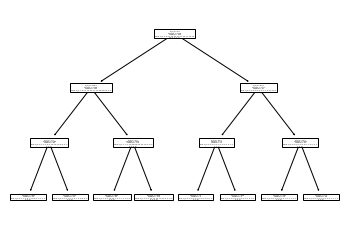

In [20]:
#PLot the decision tree
tree.plot_tree(model);

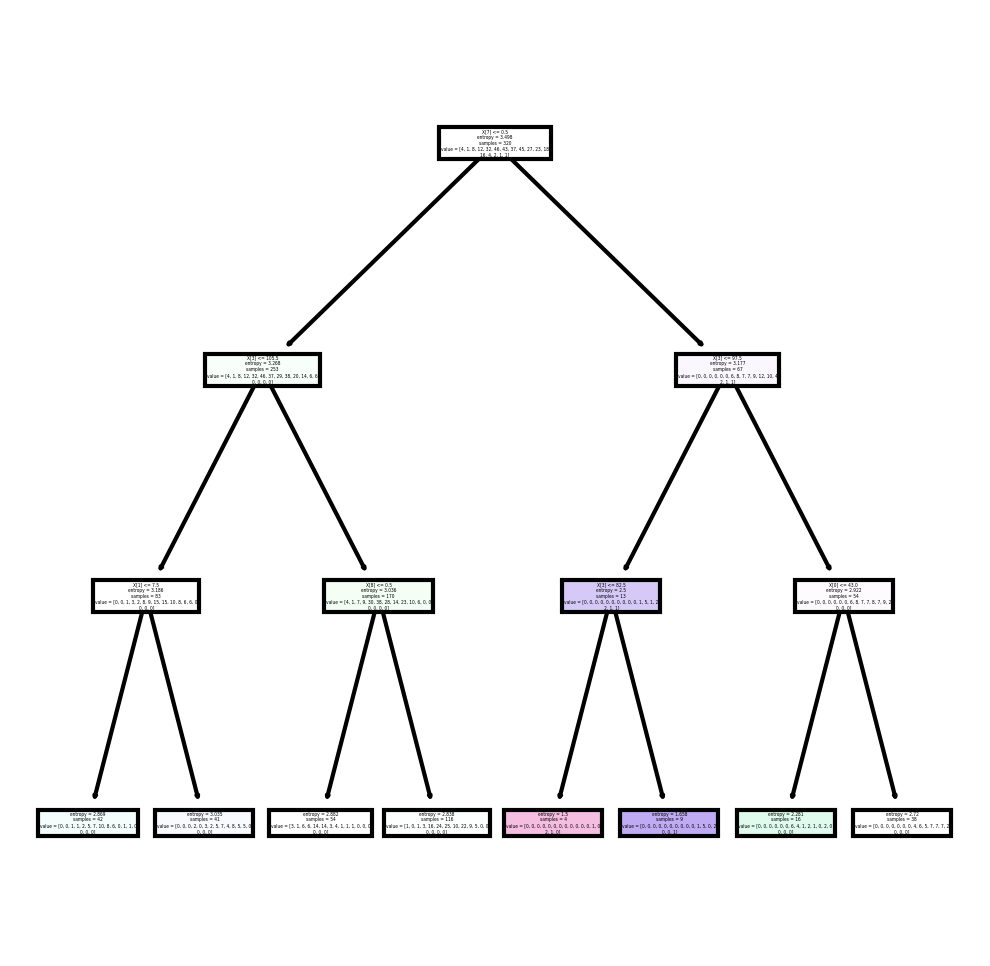

In [21]:
fn=['Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']
#cn=['Low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

#ree.plot_tree(model,feature_names = fn,class_names=cn,filled = True);
tree.plot_tree(model,feature_names = fn,filled = True);
tree.plot_tree(model,filled = True);

In [22]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

6     31
10    20
7     17
4      7
14     4
11     1
dtype: int64

In [23]:
preds

array([10,  6,  6,  7,  7,  6, 10,  7,  6, 14, 10,  6,  6,  7, 10,  7,  6,
        7,  6,  6, 10,  7,  6, 10,  6,  6, 10,  4, 10, 10, 14,  6, 14,  6,
       10,  7, 10,  4,  6,  6,  6,  4,  6,  7,  7, 10,  7,  6,  6,  6,  6,
        6, 10,  7,  4, 14, 10,  7,  7,  4,  6,  6,  7,  6,  4, 10, 10,  6,
        4, 11, 10, 10,  7,  6,  7, 10,  6,  6,  6, 10], dtype=int64)

In [24]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,4,6,7,10,11,14
Sales,,,,,,
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,2,0,0,0,0
3,1,3,2,1,0,0
4,2,6,0,1,0,0
5,1,3,2,1,0,0
6,2,5,2,2,0,0
7,0,8,5,2,0,0
8,0,0,2,3,0,0


In [25]:
# Accuracy 
np.mean(preds==y_test)

0.175

### Building Decision Tree Classifier (CART) using Gini Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.175

#### Decision Tree Regression Example

In [29]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [30]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
#Find the accuracy
model.score(X_test,y_test)

-1.3157186955591555